# Z mass peak-to-tail k factor

### Why?

 - Inverse mass cut improves signal region S/B ratio
 - Fake rate estimation uses Z peak to extract pure Z->ee sample from data
 - No comparable handle for Z tail in control regions
 - Need a way to measure k-factor that predicts tail from peak prediction, from a separate control region




|          |  MET<25   |MET>25   |
|----------|-----------|-----------|
|pass eVeto|A          |Signal - invert $m(Z)$ cut     |
|fail eVeto|B          | D         |

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20
- electron: tight, pT>10
- muon: tight, pT> 

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

In [1]:
import ROOT
from IPython.display import display, Math, Latex
import rootnotes

Welcome to JupyROOT 6.10/05


In [2]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


## Import Samples

`%run interactiveStackTree.py --baseDir /data/users/kakw/Resonances/LepGammaMETapplied_elg_2018_08_22/ --samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py --lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root`


In [3]:
%run interactiveStackTree.py --baseDir /data/users/kakw/Resonances/LepGamma_Mlpp_testb_elg_2018_08_26/ --samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py --lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root


-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
Sample GJets_HT-600ToInf              cross section : 93.380000 pb     N Events : 2463946  sample lumi : 26386.228314      Scale : 1.360558      
Sample WZ3LNLO                        cross section : 5.260000 pb      N Events : 8260201  sample lumi : 1570380.418251    Scale : 0.022861      
Sample WJetsToLNu_HT-800To1200        cross section : 7.484300 pb      N Events : 1544513  sample lumi : 206367.061716     Scale : 0.173962      
Sample WJetsToLNu_HT-600To800         cross section : 16.288000 pb     N Events : 3779141  sample lumi : 232019.953340     Scale : 0.154728      
Sample GJets_HT-100To200              cross section : 9226.000000 pb   N Events : 5131873  sample lumi : 556.240299        Scale : 64.540451     
Sample ResonanceMass2000              cross section : 0.000172 pb      N Events : 50000    sample lumi : 289872165.921251  Scale : 0.000124      
Sample TTJets_SingleLep

In [4]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
a3 = '&& ph_passEleVeto[0]==1' #CSEV
b3 = '&& ph_passEleVeto[0]==0' 
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'

xbin = range(0,50,2)+[50,52,54,60,65,75,80]
hist_config = {'colors' : [ROOT.kRed, ROOT.kBlack], 'doratio' : 1,'xlabel':'MET','rlabel':'red/black' }

## Fill histogram

In [5]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_lep_ph', [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],['Zgamma']*2, (50,0,200),
                          hist_config, {}, {'legend_entries':['Z#gamma : 1 #gamma +1e', ' Z#gamma : 2 #gamma +1e']})

Creating hist for m_lep_ph
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph
['ZGTo2LG']
Scale m_lep_ph by 1.000000
Creating hist for m_lep_ph_0
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_0
['ZGTo2LG']
Scale m_lep_ph_0 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86744f5d88>, <SampleManager.Sample instance at 0x7f867450f878>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


Error in <TGClient::TGClient>: can't open display "", switching to batch mode...
 In case you run from a remote ssh session, reconnect with ssh -Y


### ele+leading $\gamma$ reconstructed mass 
 - invariant mass of leading photon and electron in Zgamma sample
 - 1 photon curve is messed up probably because an electron managed to be undetected
 - 2 photon curve the other peak arise from incorrect choice of photon in reconstructed mass

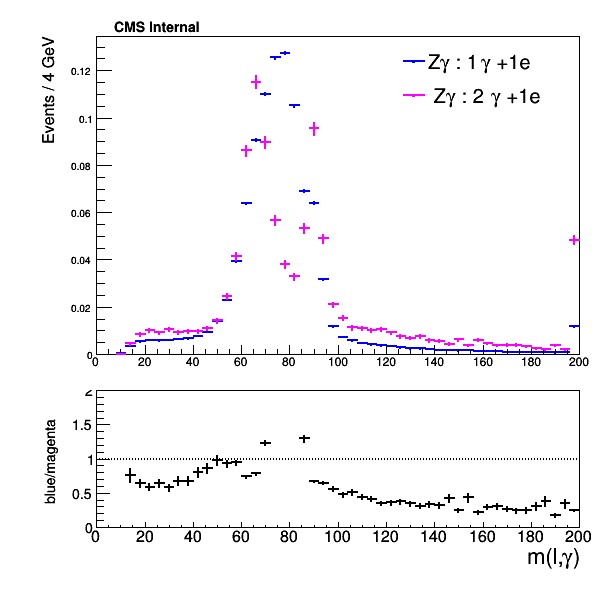

Info in <TCanvas::Print>: png file /tmp/tmpP7nsfD.png has been created


In [6]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

samples.curr_canvases['base']


In [7]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,         'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_lep_ph', [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample m_lep_ph
removing sample m_lep_ph_0
removing sample ratioZgamma
Creating hist for m_lep_ph_1
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_1
['DYJetsToLL_M-50']
Scale m_lep_ph_1 by 1.000000
Creating hist for m_lep_ph_2
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_2
['ZGTo2LG']
Scale m_lep_ph_2 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f867450f878>, <SampleManager.Sample instance at 0x7f86743b04d0>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


In [8]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

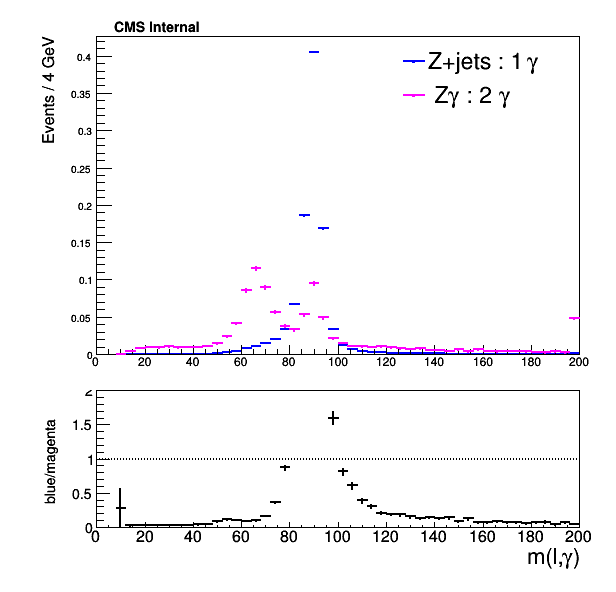

Info in <TCanvas::Print>: png file /tmp/tmpxPcEEx.png has been created


In [9]:
samples.curr_canvases['base']


#### Here:
 - one peak is correctly reconstructed with the fake
 - whereas lower peak used the real photon instead
 - choosing the less energetic photon may lead to higher mass if it is more antagonal to the electron object

In [10]:
ROOT.gStyle.SetPalette(ROOT.kBird)
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0]', baseeta +"&& ph_n==2",
               'Zgamma',(160,0,400,60,0,300),'COLZ','M(l,#gamma_{1})','M(l,#gamma_{2})')


removing sample m_lep_ph_1
removing sample m_lep_ph_2
removing sample ratioZgamma
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000



### 2D plot: comparing reconstructed mass from leading v subleading photon

 - plotting $m (l, \gamma_{1})$ and $m (l, \gamma_{2})$
 - clearly see Z peak as a cross in the plot
 - extra blob at $M\sim60GeV$
 
 

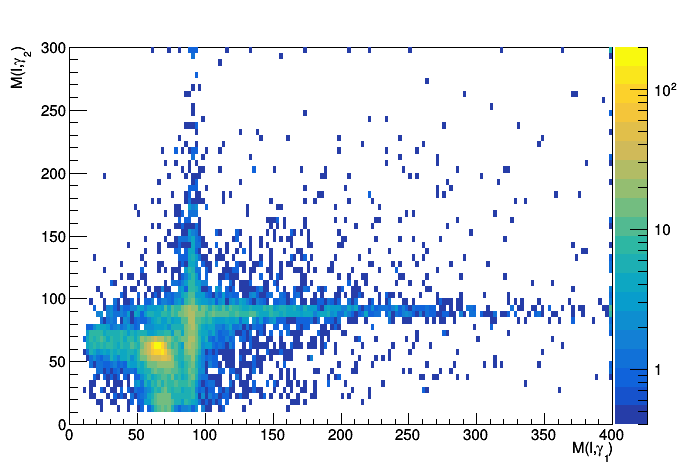

Info in <TCanvas::Print>: png file /tmp/tmpaxvxOc.png has been created


In [11]:
samples.samples[-1].hist.GetZaxis().SetRangeUser(0.4,200)
samples.samples[-1].hist.SetStats(0)
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']

In [12]:
samples.Draw2D( 'm_lep_ph_comb_leadLep[0]:m_lep_ph_ph', baseeta +"&& ph_n==2",
               'Zgamma',(160,0,400,60,0,300),'COLZ','M(l,#gamma_{1},#gamma_{2})','M(l,#gamma_{1})')


removing sample Zgamma_0
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[0]:m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[0]:m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: basecan0


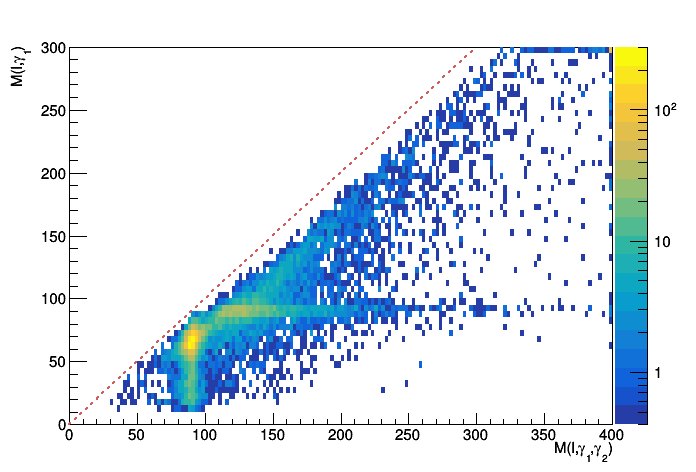

Info in <TCanvas::Print>: png file /tmp/tmpTYZRT3.png has been created


In [13]:
samples.samples[-1].hist.GetZaxis().SetRangeUser(0.4,300)
samples.samples[-1].hist.SetStats(0)
line =  ROOT.TLine(0,0,300,300);
line.SetLineWidth(2);
line.SetLineStyle(2);
line.SetLineColor(46);
line.Draw()
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']


In [14]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma,#gamma)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lep_ph_ph'], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],
                          ['Z+jets','Zgamma'], (50,0,200), hist_config, {},
                          {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma, m_{l#gamma#gamma}']})

removing sample Zgamma_0
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_3
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_3
['DYJetsToLL_M-50']
Scale m_lep_ph_3 by 1.000000
Creating hist for m_lep_ph_4
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_4
['ZGTo2LG']
Scale m_lep_ph_4 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743be950>, <SampleManager.Sample instance at 0x7f86940f61b8>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


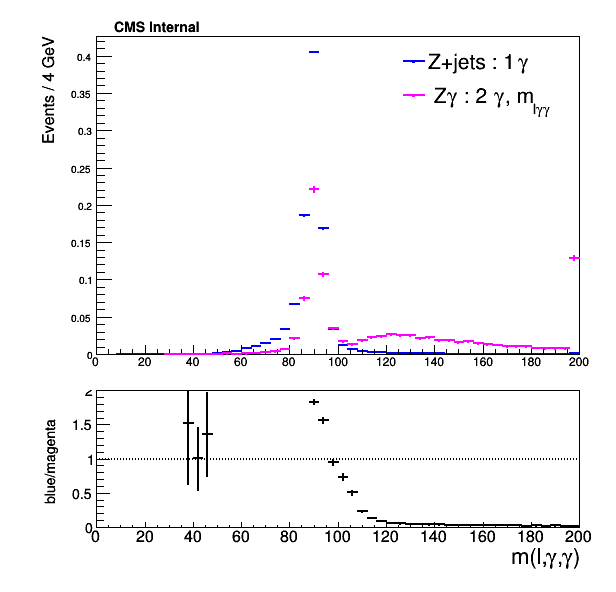

Info in <TCanvas::Print>: png file /tmp/tmpnBT2Yf.png has been created


In [15]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

samples.curr_canvases['base']


In [16]:
ROOT.gStyle.SetPalette(ROOT.kBird)
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0]', 
               baseeta +"&& ph_n==2 && trueph_n==1 && trueph_motherPID==23",
               'Zgamma',(90,0,300,60,0,200),'COLZ','M(l,#gamma_{1})','M(l,#gamma_{2})')


removing sample m_lep_ph_3
removing sample m_lep_ph_4
removing sample ratioZgamma
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==23 
(90, 0, 300, 60, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==23 
(90, 0, 300, 60, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


### leading vs subleading $\gamma$ reconstructed mass $m_{l,\gamma}$ with gen photon motherPID = 23 ($Z_{0}$) 

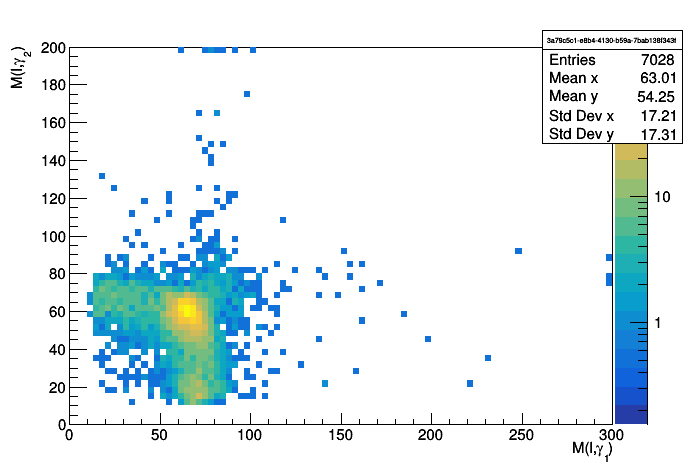

Info in <TCanvas::Print>: png file /tmp/tmp99xcx1.png has been created


In [17]:
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']

In [18]:
ROOT.gStyle.SetPalette(ROOT.kBird)
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0]', 
               baseeta +"&& ph_n==2 && trueph_n==1 && trueph_motherPID==22",
               'Zgamma',(90,0,300,60,0,200),'COLZ','M(l,#gamma_{1})','M(l,#gamma_{2})')


removing sample Zgamma_0
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==22 
(90, 0, 300, 60, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==22 
(90, 0, 300, 60, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: basecan0


### leading vs subleading $\gamma$ reconstructed mass $m_{l,\gamma}$ with gen photon motherPID = 22 ($\gamma_{0}$) 

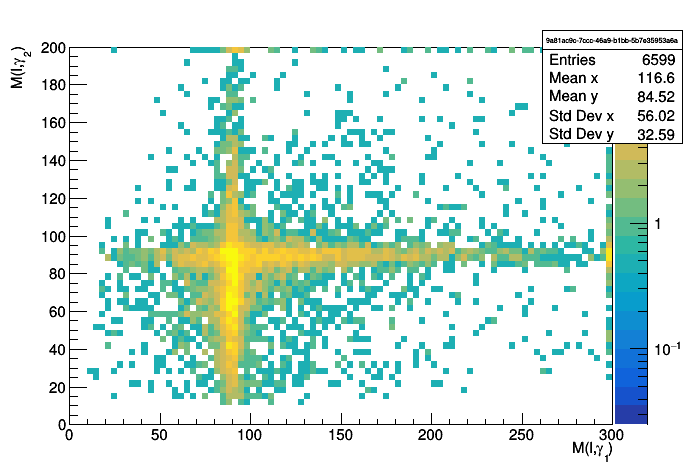

Info in <TCanvas::Print>: png file /tmp/tmpHZAgkc.png has been created


In [19]:
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']

### notes

- Data card for Zgamma generator:

https://github.com/cms-sw/genproductions/blob/9804294c57bb1e9796382fc92090075b9a4a84bc/bin/MadGraph5_aMCatNLO/cards/production/13TeV/ZATo2LA01j_5f_NLO_FXFX/ZATo2LA01j_5f_NLO_FXFX_run_card.dat

1. when mother PID = 22 (photon): 

    - the mother photon comes from a hard interaction quark

    - electron pt sums to Z mass 

1. when mother PID = 23 (Z boson):

    - photon is collinear with one of the electron
    - pt sum of electron seems off the mark from Z mass, seems to be of the order photon pT

--- 1 ---

    
    ***********************************************************************************
    *    Row   * Instance *   gen_PID * gen_mothe * gen_fromH *   gen_phi *   gen_pt  *
    ***********************************************************************************
    *       12 *        0 *        23 *         2 *         0 * -2.242582 * 11.536655 *
    *       12 *        1 *        22 *         2 *         0 * 0.8990098 * 11.536655 *
    *       12 *        2 *        23 *        23 *         0 * -2.388667 * 18.662937 *
    *       12 *        3 *        23 *        23 *         0 * -2.444482 * 17.589969 *
    *       12 *        4 *        23 *        23 *         0 * -2.319227 * 19.507524 *
    *       12 *        5 *        23 *        23 *         0 * -2.387543 * 19.809474 *
    *       12 *        6 *        23 *        23 *         0 * -2.414541 * 19.689378 *
    *       12 *        7 *        22 *        22 *         1 * 2.8962256 * 10.515576 *<<<
    *       12 *        8 *        11 *        23 *         0 * -2.124343 * 55.441967 *
    *       12 *        9 *       -11 *        23 *         0 * 1.1700824 * 37.007217 *
    *       12 *       10 *        11 *        11 *         1 * -2.125319 * 55.112918 *<<<
    *       12 *       11 *       -11 *       -11 *         1 * 1.1700824 * 37.002239 *<<<
    *       12 *       12 *        21 *      2212 *         0 * 0.5243875 * 20.684333 *


--- 2 ---
    
    ***********************************************************************************
    *    Row   * Instance *   gen_PID * gen_mothe * gen_fromH *   gen_phi *   gen_pt  *
    ***********************************************************************************
    *        0 *        0 *        23 *        23 *         0 * -1.651171 * 5.5309357 *
    *        0 *        1 *        23 *        23 *         0 * -1.450965 * 7.2031130 *
    *        0 *        2 *        23 *        23 *         0 * -1.239111 * 6.9933800 *
    *        0 *        3 *        13 *        23 *         0 * 0.0910035 * 33.902069 *<<<<
    *        0 *        4 *       -13 *        23 *         0 * -2.899175 * 45.351413 *<<<
    *        0 *        5 *        22 *        23 *         1 * 0.0948786 * 12.597539 *<<<<
    *        0 *        6 *        13 *        13 *         0 * 0.0910088 * 33.892955 *
    *        0 *        7 *       -13 *       -13 *         0 * -2.899175 * 45.351413 *
    *        0 *        8 *       -13 *       -13 *         1 * -2.899175 * 45.351413 *
    *        0 *        9 *        13 *        13 *         1 * 0.0910088 * 33.892955 *
    *        0 *       10 *         1 *      2212 *         0 * -1.488160 * 5.7920198 *
    *        0 *       11 *         2 *      2212 *         0 * 0.1679915 * 6.0793767 *
    *        0 *       12 *        21 *      2212 *         0 * 1.8993362 * 6.9830250 *
    *        0 *       13 *        21 *      2212 *         0 * 0.8363395 * 7.0736775 *
    *        0 *       14 *        21 *      2212 *         0 * 2.3591649 * 5.8912453 *
    *        0 *       15 *         2 *      2212 *         0 * 0.6795014 * 8.8710212 *```

In [20]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'reconstructed mass',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lep_ph_ph'], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2&& trueph_motherPID==23 "],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample Zgamma_0
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_5
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_5
['DYJetsToLL_M-50']
Scale m_lep_ph_5 by 1.000000
Creating hist for m_lep_ph_6
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2&& trueph_motherPID==23  
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2&& trueph_motherPID==23  
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_6
['ZGTo2LG']
Scale m_lep_ph_6 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743bed40>, <SampleManager.Sample instance at 0x7f86743bee18>]
{'name': '__AllStack__'}
{'name': [], 'isActive':

### e+2$\gamma$ mass in Zgamma events where generator photon has Z as mother

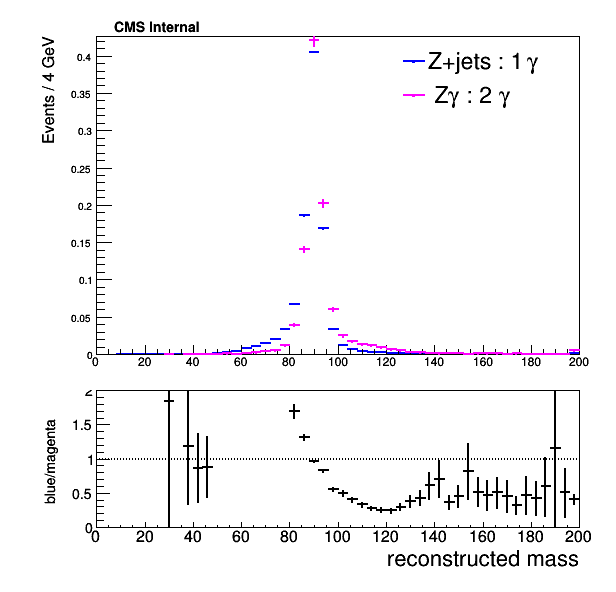

Info in <TCanvas::Print>: png file /tmp/tmpsHAFI7.png has been created


In [21]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']

In [22]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_lep_ph', [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2 && trueph_motherPID==22"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample m_lep_ph_5
removing sample m_lep_ph_6
removing sample ratioZgamma
Creating hist for m_lep_ph_7
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_7
['DYJetsToLL_M-50']
Scale m_lep_ph_7 by 1.000000
Creating hist for m_lep_ph_8
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_motherPID==22 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_motherPID==22 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_8
['ZGTo2LG']
Scale m_lep_ph_8 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743c4488>, <SampleManager.Sample instance at 0x7f86744f58c0>]
{'name': '__AllStack__'}
{'name': [], 'isActive':

In [23]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

### e+$\gamma_{1}$ mass in Zgamma events where generator photon is an ISR

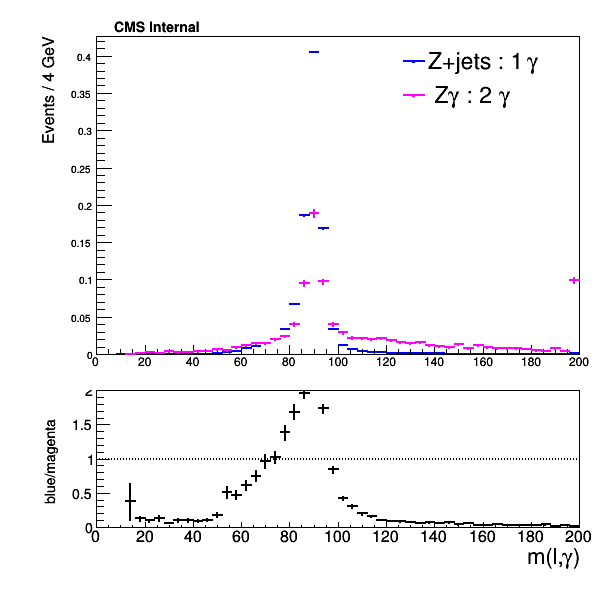

Info in <TCanvas::Print>: png file /tmp/tmpoFEYoE.png has been created


In [24]:
samples.curr_canvases['base']


In [25]:
cond="(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91))"
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,'doratio' : 1,  'normalize':1}
samples.CompareSelections(['m_lep_ph','m_lep_ph_comb_leadLep[1]*%s + m_lep_ph_comb_leadLep[0]*(!%s)' %(cond,cond)], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2 && trueph_motherPID==22"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample m_lep_ph_7
removing sample m_lep_ph_8
removing sample ratioZgamma
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_9
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_9
['DYJetsToLL_M-50']
Scale m_lep_ph_9 by 1.000000
Creating hist for m_lep_ph_10
m_lep_ph_comb_leadLep[1]*(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91)) + m_lep_ph_comb_leadLep[0]*(!(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91))) : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_motherPID==22 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]*(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91)) + m_lep_ph_comb_leadLep[0]*(!(abs(m_lep_ph_comb_le

In [26]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

### e+$\gamma_{1}$ or e+$\gamma_{2}$ mass in Zgamma events where generator photon is an ISR, whichever is closer to Z mass

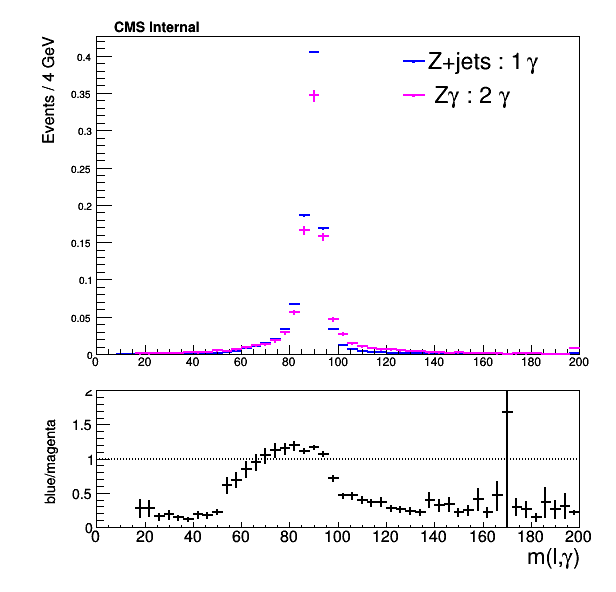

Info in <TCanvas::Print>: png file /tmp/tmpMHxaKi.png has been created


In [27]:
samples.curr_canvases['base']


In [28]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'reconstructed mass',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lpp_best'], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],
                          ['Z+jets','Zgamma'], (50,0,200),hist_config, {}, 
                          {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma, closest to m_{Z}']})

removing sample m_lep_ph_9
removing sample m_lep_ph_10
removing sample ratioZgamma
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_11
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_11
['DYJetsToLL_M-50']
Scale m_lep_ph_11 by 1.000000
Creating hist for m_lep_ph_12
m_lpp_best : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lpp_best : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_12
['ZGTo2LG']
Scale m_lep_ph_12 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743c4758>, <SampleManager.Sample instance at 0x7f86743c47e8>]
{'name': '__AllStack__'}
{'name': [

### Solution: Choosing the reconstructed mass closest to Z

- we have 1 leptons and 2 photon objects. There are 3 meaningful ways to form invariant mass: $e + \gamma_{1}$,  $e + \gamma_{2}$, $e + \gamma_{1} + \gamma_{2}$.
- we can try to plot whichever of the three that is closest to the literature Z mass value

- The plot shows a rather clean distribution of Z peak, with a shift to the right (<5GeV)

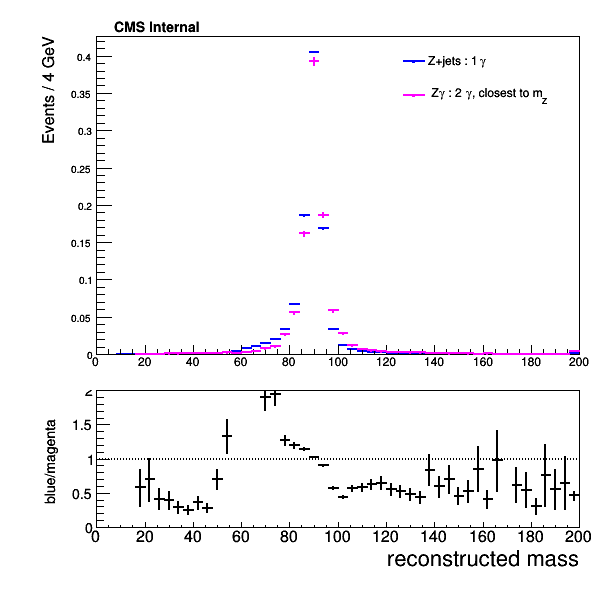

Info in <TCanvas::Print>: png file /tmp/tmpd_LEE_.png has been created


In [29]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']

## conclusion:

 - the 60GeV invariant mass blob is probably due to FSR photons. In GEN info this is marked as a photon coming from Z
 - The best way to reconstruct the mass (if we are given only Zgamma), is to try all combinations of $e+2\gamma$ and choose the one closest to the Z mass. But we don't know how well this works with other samples as backgrounds.
 - how do we measure transfer factor as function of photon pt?
 - It may be simpler if we are to a different Z+X sample. What is X?


Kak Wong, 2018-08-28




### BACKUP



### number of reconstructed photons in Zgamma

In [30]:
samples.CompareSelections('ph_n', [baseeta,],['Z+jets'], (3,0,3),{'xlabel': 'N_{#gamma}'},{},{'legend_entries':['Z#gamma']})


removing sample m_lep_ph_11
removing sample m_lep_ph_12
removing sample ratioZgamma
Creating hist for ph_n
ph_n : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4 
(3, 0, 3)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
ph_n : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4 
(3, 0, 3)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR ph_n
['DYJetsToLL_M-50']
Scale ph_n by 1.000000
[<SampleManager.Sample instance at 0x7f86743d33f8>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


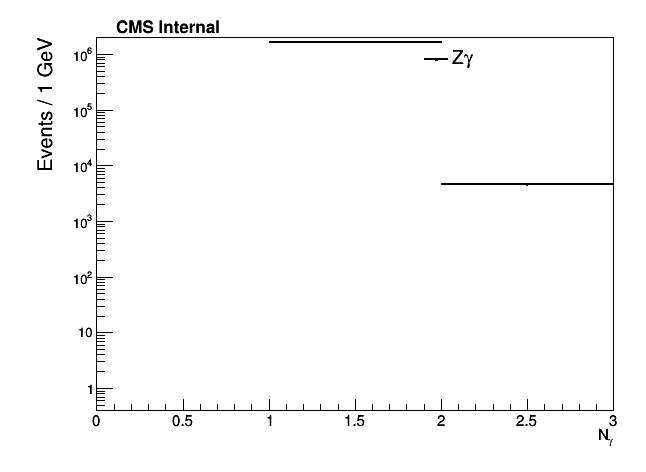

Info in <TCanvas::Print>: png file /tmp/tmpT2E_pj.png has been created


In [31]:
samples.curr_canvases['base'].SetLogy()
samples.curr_canvases['base']


### number of true photons in Z+jets vs Z gamma


removing sample ph_n
Creating hist for trueph_n
trueph_n : 1 
(5, 0, 5)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
trueph_n : 1 
(5, 0, 5)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR trueph_n
['DYJetsToLL_M-50']
Scale trueph_n by 1.000000
Creating hist for trueph_n_0
trueph_n : 1 
(5, 0, 5)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
trueph_n : 1 
(5, 0, 5)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR trueph_n_0
['ZGTo2LG']
Scale trueph_n_0 by 1.000000
[<SampleManager.Sample instance at 0x7f86743d36c8>, <SampleManager.Sample instance at 0x7f86743d3758>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


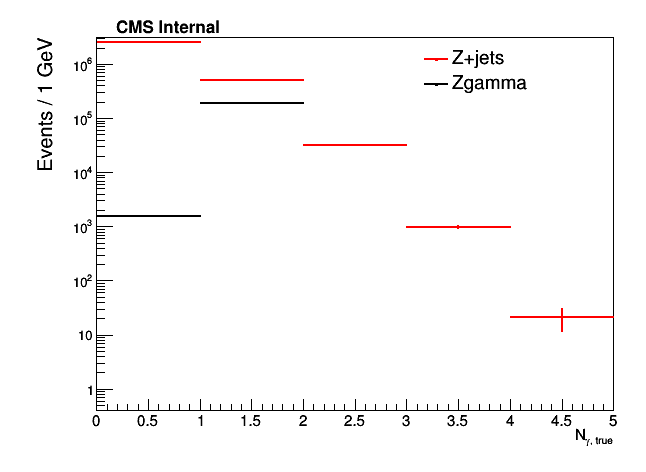

Info in <TCanvas::Print>: png file /tmp/tmpyh3ett.png has been created


In [32]:
hist_config = {'colors' : [ROOT.kRed, ROOT.kBlack],'xlabel':'N_{#gamma, true}' }
samples.CompareSelections("trueph_n", ["1","1"],['Z+jets','Zgamma'],(5,0,5),hist_config)
samples.curr_canvases['base'].SetLogy()
samples.curr_canvases['base']

### $l+2\gamma$ invariant mass vs lep + subleading photon

In [33]:
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_ph', baseeta +"&& ph_n==2",
               'Zgamma',(160,0,400,60,0,300),'COLZ','M(l,#gamma_{1},#gamma_{2})','M(l,#gamma_{2})')


removing sample trueph_n
removing sample trueph_n_0
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


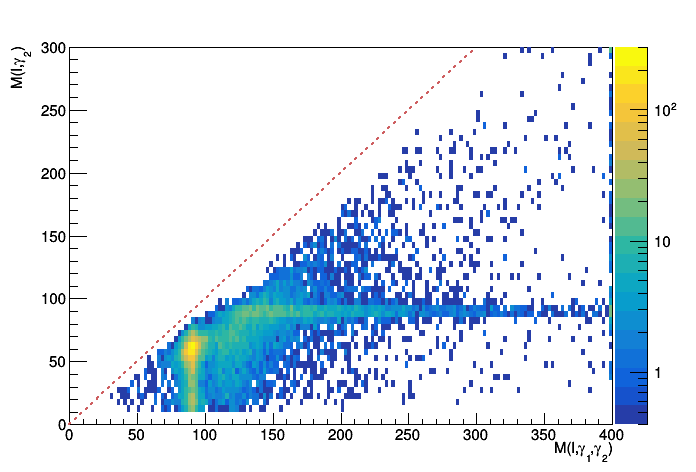

Info in <TCanvas::Print>: png file /tmp/tmp2EHiNf.png has been created


In [34]:
samples.samples[-1].hist.GetZaxis().SetRangeUser(0.4,300)
samples.samples[-1].hist.SetStats(0)
line =  ROOT.TLine(0,0,300,300);
line.SetLineWidth(2);
line.SetLineStyle(2);
line.SetLineColor(46);
line.Draw()
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']


In [35]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,
               'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lep_ph_comb_leadLep[0]'], [baseeta +"&& ph_n==2",baseeta +"&& ph_n==2"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['m_lep_ph', ' m_lep_ph_comb_leadLep[0]']})

removing sample Zgamma_0
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_13
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_13
['DYJetsToLL_M-50']
Scale m_lep_ph_13 by 1.000000
Creating hist for m_lep_ph_14
m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_14
['ZGTo2LG']
Scale m_lep_ph_14 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743d3638>, <SampleManager.Sample instance at 0x7f86743c4c68>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### not sure what is the difference with comb_leadLep

In [36]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

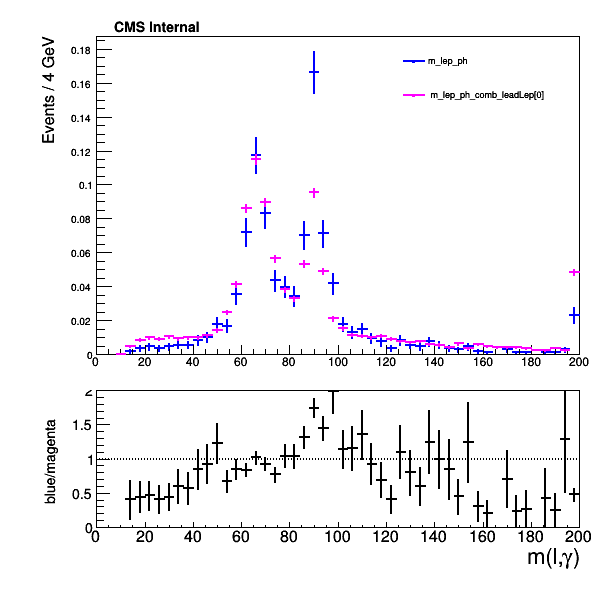

Info in <TCanvas::Print>: png file /tmp/tmpLdgDZl.png has been created


In [37]:
samples.curr_canvases['base']


In [38]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'real p_{T}(#gamma)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections('trueph_pt[0]', ["1","1"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':[ 'Z+jets',' Z #gamma ']})

removing sample m_lep_ph_13
removing sample m_lep_ph_14
removing sample ratioZgamma
Creating hist for trueph_pt
trueph_pt[0] : 1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
trueph_pt[0] : 1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR trueph_pt
['DYJetsToLL_M-50']
Scale trueph_pt by 1.000000
Creating hist for trueph_pt_0
trueph_pt[0] : 1 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
trueph_pt[0] : 1 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR trueph_pt_0
['ZGTo2LG']
Scale trueph_pt_0 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743c4c68>, <SampleManager.Sample instance at 0x7f86743d3c20>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### distribution of gen photon transverse momentum

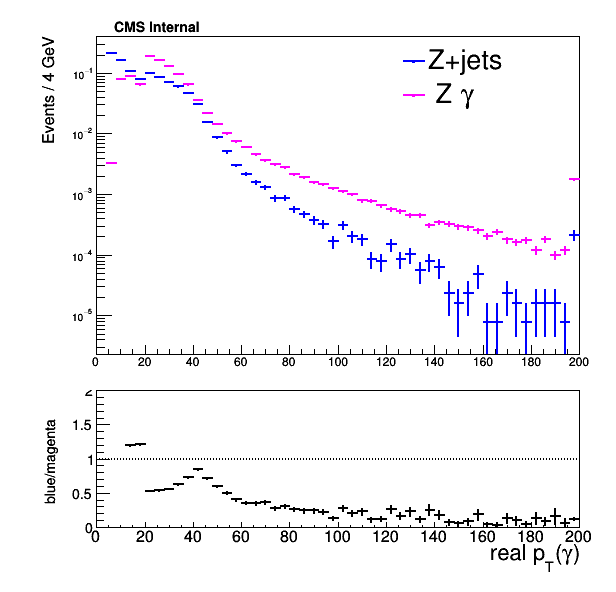

Info in <TCanvas::Print>: png file /tmp/tmp937m8t.png has been created


In [39]:
samples.curr_canvases['top'].cd()
samples.curr_canvases['top'].SetLogy()
samples.samples[-3].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']


In [40]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'real p_{T}(e)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections('truelep_pt', ["1","1"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':[ ' Z+jets','Z#gamma ']})

removing sample trueph_pt
removing sample trueph_pt_0
removing sample ratioZgamma
Creating hist for truelep_pt
truelep_pt : 1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
truelep_pt : 1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR truelep_pt
['DYJetsToLL_M-50']
Scale truelep_pt by 1.000000
Creating hist for truelep_pt_0
truelep_pt : 1 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
truelep_pt : 1 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR truelep_pt_0
['ZGTo2LG']
Scale truelep_pt_0 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743d93b0>, <SampleManager.Sample instance at 0x7f86743d3758>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### distribution of gen electron transverse momentum

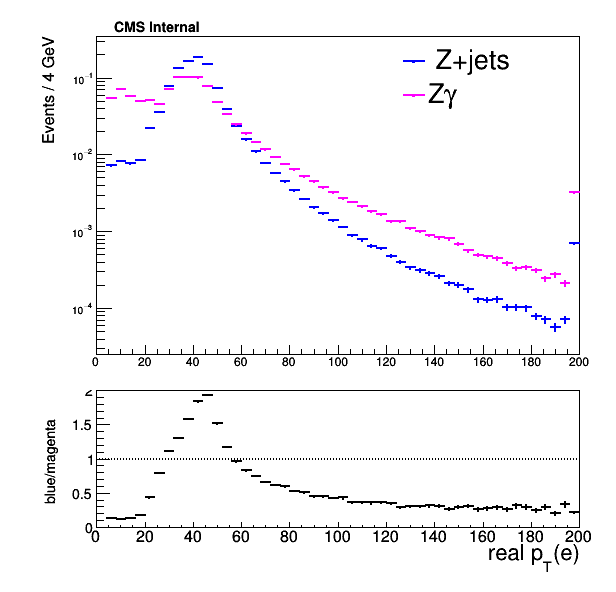

Info in <TCanvas::Print>: png file /tmp/tmpKVIqGY.png has been created


In [41]:
samples.curr_canvases['top'].cd()
samples.curr_canvases['top'].SetLogy()
samples.samples[-3].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']


In [42]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':' p_{T}(e)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections(['truelep_pt','el_pt'], ["1","1"],['Zgamma']*2, (50,0,200),
                          hist_config, {}, {'legend_entries':[ 'Z#gamma true e ','Z#gamma reco e']})

removing sample truelep_pt
removing sample truelep_pt_0
removing sample ratioZgamma
Case when multiple vars is used is not implemented
Creating hist for truelep_pt_1
truelep_pt : 1 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
truelep_pt : 1 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR truelep_pt_1
['ZGTo2LG']
Scale truelep_pt_1 by 1.000000
Creating hist for truelep_pt_2
el_pt : 1 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
el_pt : 1 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR truelep_pt_2
['ZGTo2LG']
Scale truelep_pt_2 by 1.000000
Scale ratioZgamma by 1.000000
[<SampleManager.Sample instance at 0x7f86743d93b0>, <SampleManager.Sample instance at 0x7f86743d3b48>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### true vs reco electron transverse momentum in Z gamma
- we lost a bunch of electrons less than 30 GeV

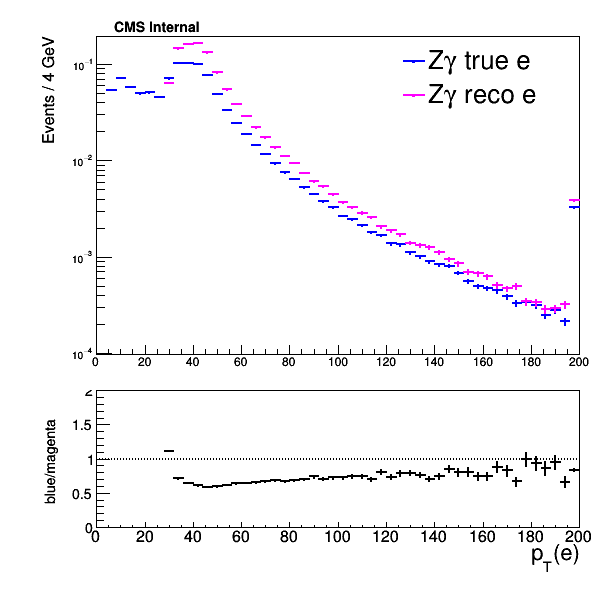

Info in <TCanvas::Print>: png file /tmp/tmpZW_u2r.png has been created


In [43]:
samples.curr_canvases['top'].cd()
samples.curr_canvases['top'].SetLogy()
samples.samples[-3].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']
